In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# File paths for the datasets
file_oxygen = '/home/zmey1/VSCODE_FILES/OceanObservation/woa23_all_o00mn5d.csv'
file_salinity = '/home/zmey1/VSCODE_FILES/OceanObservation/woa23_decav_s00mn5d.csv'
file_temperature = '/home/zmey1/VSCODE_FILES/OceanObservation/woa23_decav_t00mn5d.csv'


annual_dataset = pd.read_csv(file_oxygen, skiprows=1)
depth = annual_dataset.columns[2:]
column_names = ["Latitude", "Longitude"] + list(depth)
annual_dataset.columns = column_names
reshaped_data_oxygen = pd.melt(
    annual_dataset,
    id_vars=["Latitude", "Longitude"],
    var_name="Depth",
    value_name="Oxygen_Value"
)

reshaped_data_oxygen["Latitude"] = pd.to_numeric(reshaped_data_oxygen["Latitude"], errors="coerce")
reshaped_data_oxygen["Longitude"] = pd.to_numeric(reshaped_data_oxygen["Longitude"], errors="coerce")
reshaped_data_oxygen["Depth"] = pd.to_numeric(reshaped_data_oxygen["Depth"], errors="coerce")
reshaped_data_oxygen["Oxygen_Value"] = pd.to_numeric(reshaped_data_oxygen["Oxygen_Value"], errors="coerce")
annual_reshaped_data_oxygen = reshaped_data_oxygen.dropna()
annual_reshaped_data_oxygen.head()


,Latitude,Longitude,Depth,Oxygen_Value
1774,-77.5,-177.5,5.0,345.008
1775,-77.5,-172.5,5.0,368.465
1776,-77.5,-167.5,5.0,360.601
1777,-77.5,-162.5,5.0,359.496
1778,-77.5,-157.5,5.0,363.794


In [3]:
# Preprocess function to handle reshaping
def preprocess_dataset(file_path, variable_name):
    dataset = pd.read_csv(file_path, skiprows=1)
    depth = dataset.columns[2:]
    column_names = ["Latitude", "Longitude"] + list(depth)
    dataset.columns = column_names
    
    reshaped_data = pd.melt(
        dataset,
        id_vars=["Latitude", "Longitude"],
        var_name="Depth",
        value_name=variable_name
    )
    
    reshaped_data["Latitude"] = pd.to_numeric(reshaped_data["Latitude"], errors="coerce")
    reshaped_data["Longitude"] = pd.to_numeric(reshaped_data["Longitude"], errors="coerce")
    reshaped_data["Depth"] = pd.to_numeric(reshaped_data["Depth"], errors="coerce")
    reshaped_data[variable_name] = pd.to_numeric(reshaped_data[variable_name], errors="coerce")
    
    return reshaped_data.dropna()

# Process each dataset
oxygen_data = preprocess_dataset(file_oxygen, "Oxygen_Value")
salinity_data = preprocess_dataset(file_salinity, "Salinity_Value")
temperature_data = preprocess_dataset(file_temperature, "Temperature_Value")

# Merge the datasets on shared dimensions
combined_data = pd.merge(oxygen_data, salinity_data, on=["Latitude", "Longitude", "Depth"])
combined_data = pd.merge(combined_data, temperature_data, on=["Latitude", "Longitude", "Depth"])

# Display the first few rows of the combined dataset
print("First 10 rows of the combined dataset:")
print(combined_data.head(10))

# Save the combined dataset to a CSV file
output_file = "combined_oceanographic_data.csv"
combined_data.to_csv(output_file, index=False)
print(f"Combined dataset saved as '{output_file}'.")


First 10 rows of the combined dataset:
   Latitude  Longitude  Depth  Oxygen_Value  Salinity_Value  Temperature_Value
0     -77.5     -177.5    5.0       345.008          34.192             -0.988
1     -77.5     -172.5    5.0       368.465          34.138             -0.965
2     -77.5     -167.5    5.0       360.601          34.072             -0.878
3     -77.5     -162.5    5.0       359.496          33.979             -1.091
4     -77.5     -157.5    5.0       363.794          33.752             -1.133
5     -77.5     -152.5    5.0       341.294          33.736             -1.479
6     -77.5      -47.5    5.0       317.073          34.474             -1.597
7     -77.5      -42.5    5.0       337.572          34.164             -1.579
8     -77.5      -37.5    5.0       344.245          34.025             -1.481
9     -77.5      -32.5    5.0       345.906          34.128             -1.700
Combined dataset saved as 'combined_oceanographic_data.csv'.


In [4]:
print(combined_data[["Oxygen_Value", "Salinity_Value", "Temperature_Value", "Depth"]].dtypes)
print(combined_data[["Oxygen_Value", "Salinity_Value", "Temperature_Value", "Depth"]].isnull().sum())


Oxygen_Value         float64
Salinity_Value       float64
Temperature_Value    float64
Depth                float64
dtype: object
Oxygen_Value         0
Salinity_Value       0
Temperature_Value    0
Depth                0
dtype: int64


Summary statistics:
            Latitude      Longitude         Depth   Oxygen_Value  \
count  133549.000000  133549.000000  133549.00000  133549.000000   
mean       -6.227246     -10.923800    1218.44821     199.062570   
std        44.017819     110.337699    1317.86417      78.527776   
min       -77.500000    -177.500000       5.00000       0.000000   
25%       -42.500000    -112.500000     100.00000     154.227000   
50%       -12.500000     -17.500000     700.00000     203.070000   
75%        22.500000      87.500000    1900.00000     247.129000   
max        87.500000     177.500000    5500.00000     457.073000   

       Salinity_Value  Temperature_Value  
count   133549.000000      133549.000000  
mean        34.648312           6.429536  
std          1.125943           7.671785  
min          4.795000          -2.042000  
25%         34.490000           1.477000  
50%         34.683000           3.024000  
75%         34.897000           9.386000  
max         40.573000  

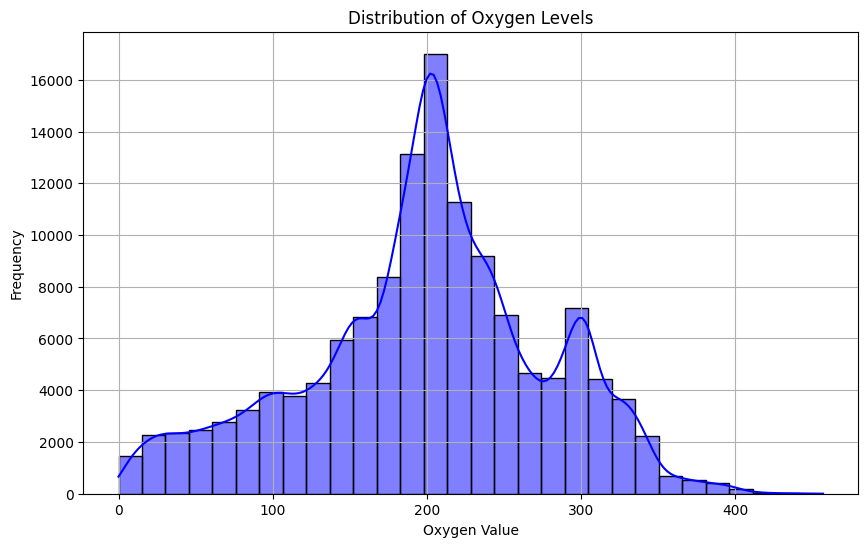

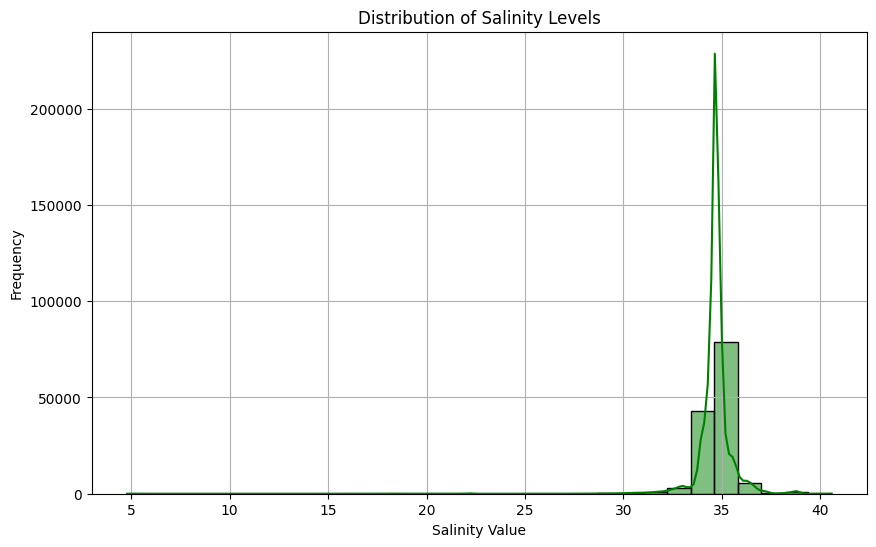

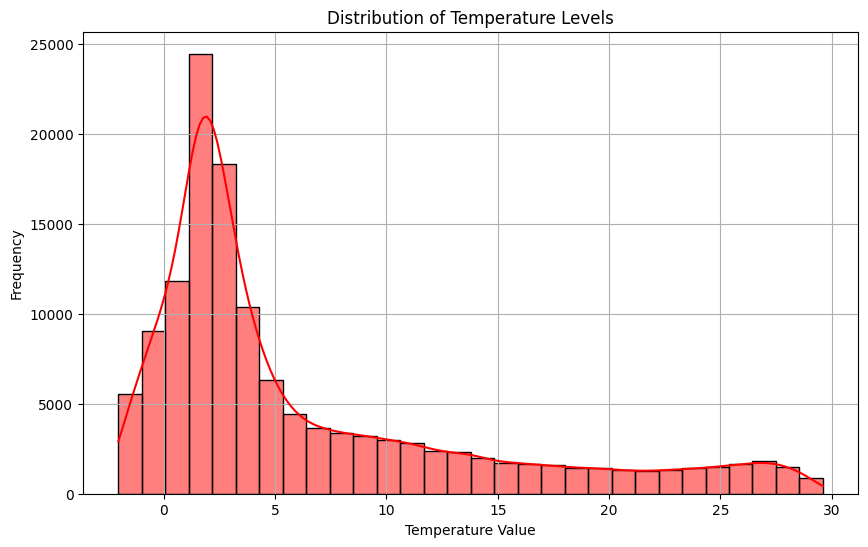

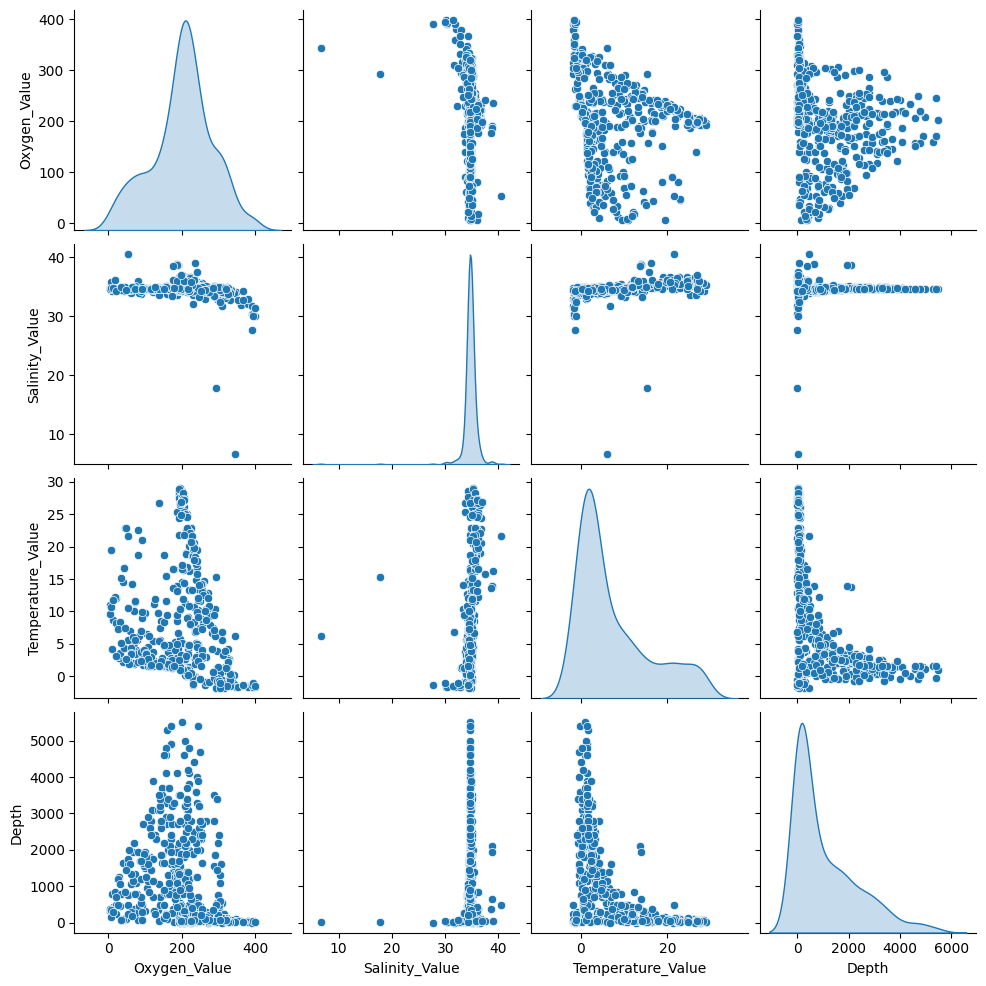

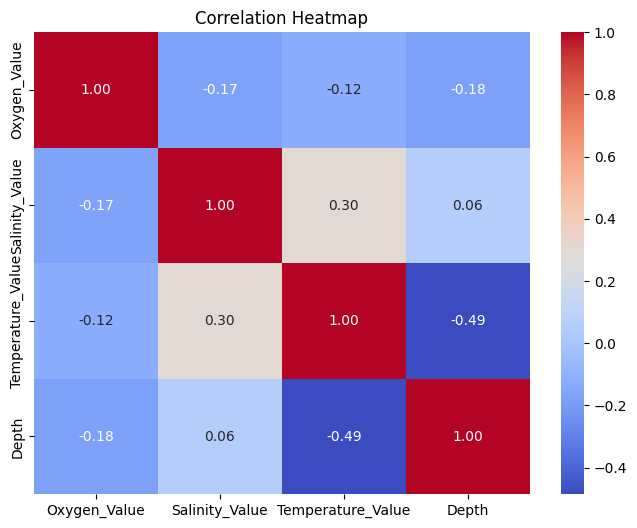

In [5]:
# Quick look at the dataset

print("Summary statistics:")

print(combined_data.describe())



# Distribution of oxygen levels

plt.figure(figsize=(10, 6))

sns.histplot(combined_data["Oxygen_Value"], kde=True, bins=30, color="blue")

plt.title("Distribution of Oxygen Levels")

plt.xlabel("Oxygen Value")

plt.ylabel("Frequency")

plt.grid(True)

plt.show()



# Distribution of salinity levels

plt.figure(figsize=(10, 6))

sns.histplot(combined_data["Salinity_Value"], kde=True, bins=30, color="green")

plt.title("Distribution of Salinity Levels")

plt.xlabel("Salinity Value")

plt.ylabel("Frequency")

plt.grid(True)

plt.show()



# Distribution of temperature levels

plt.figure(figsize=(10, 6))

sns.histplot(combined_data["Temperature_Value"], kde=True, bins=30, color="red")

plt.title("Distribution of Temperature Levels")

plt.xlabel("Temperature Value")

plt.ylabel("Frequency")

plt.grid(True)

plt.show()



# Pairplot to visualize relationships between variables

sns.pairplot(

    combined_data.sample(500),  # Sampling for faster visualization

    vars=["Oxygen_Value", "Salinity_Value", "Temperature_Value", "Depth"],

    diag_kind="kde"

)

plt.show()



# Correlation heatmap

correlation_matrix = combined_data[

    ["Oxygen_Value", "Salinity_Value", "Temperature_Value", "Depth"]

].corr()



plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap")

plt.show()

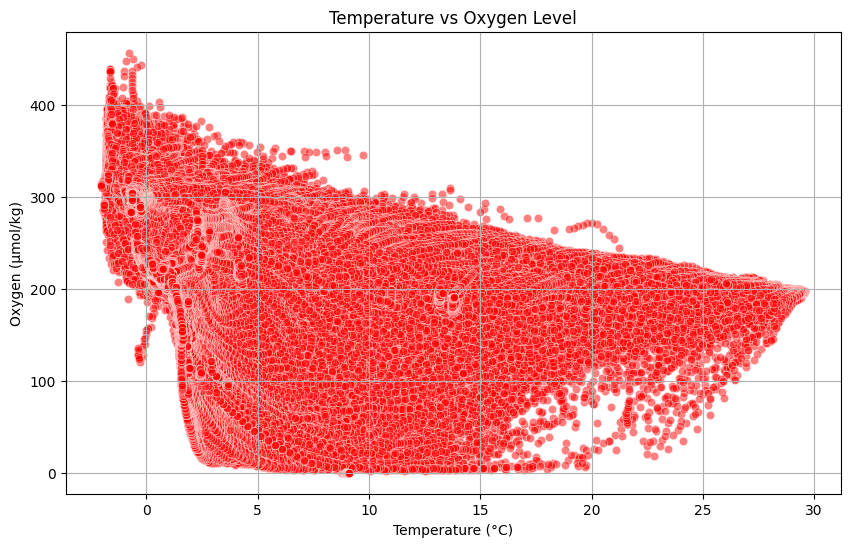

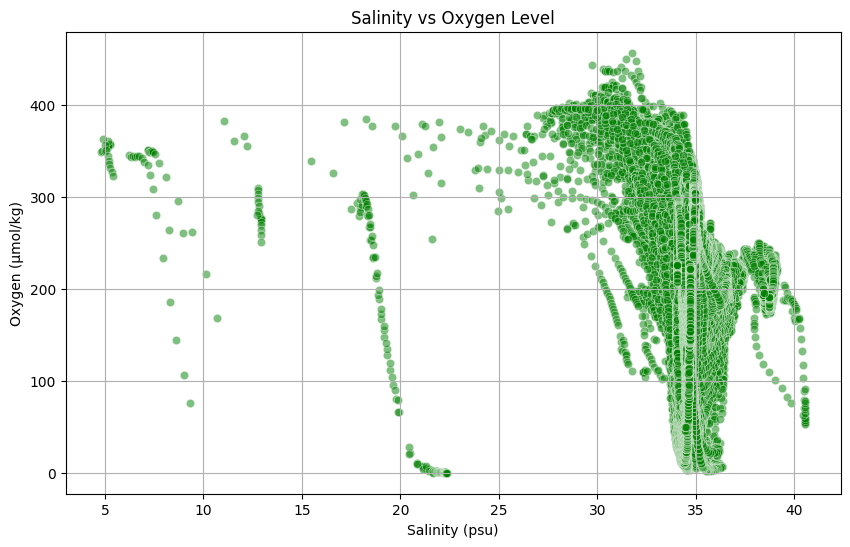

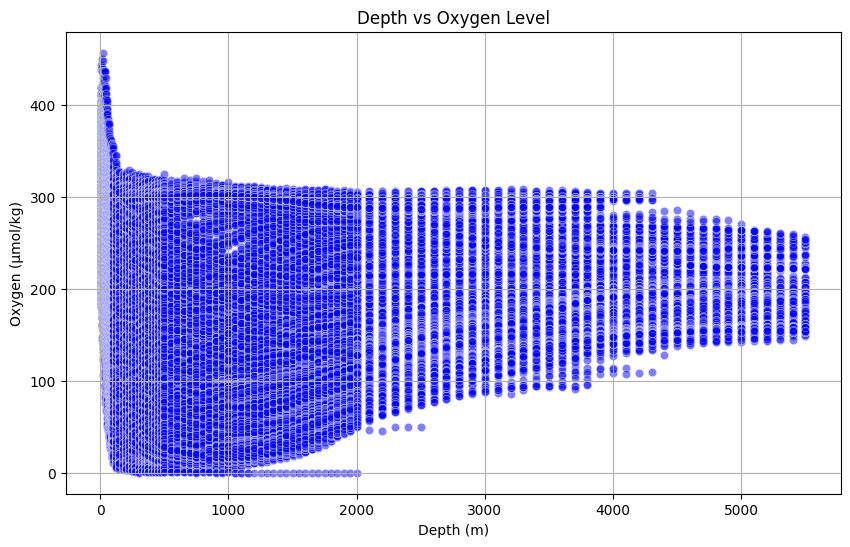

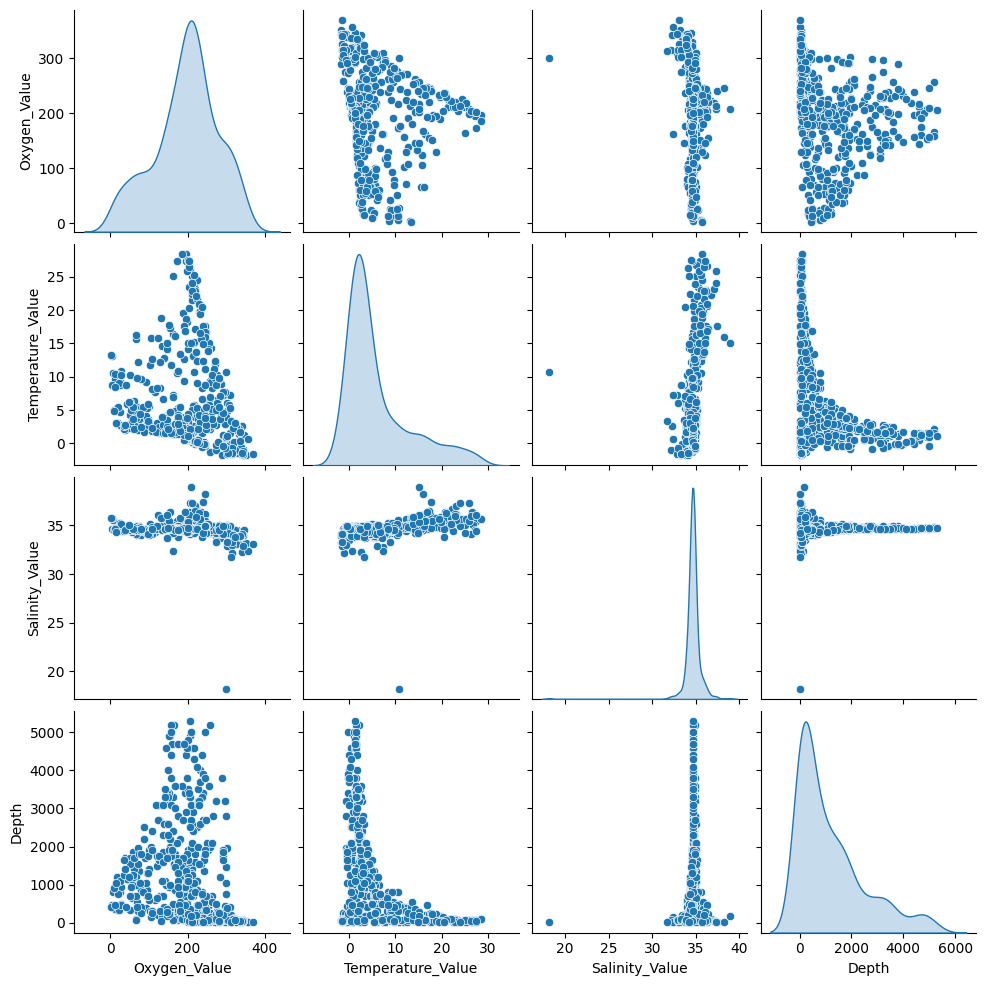

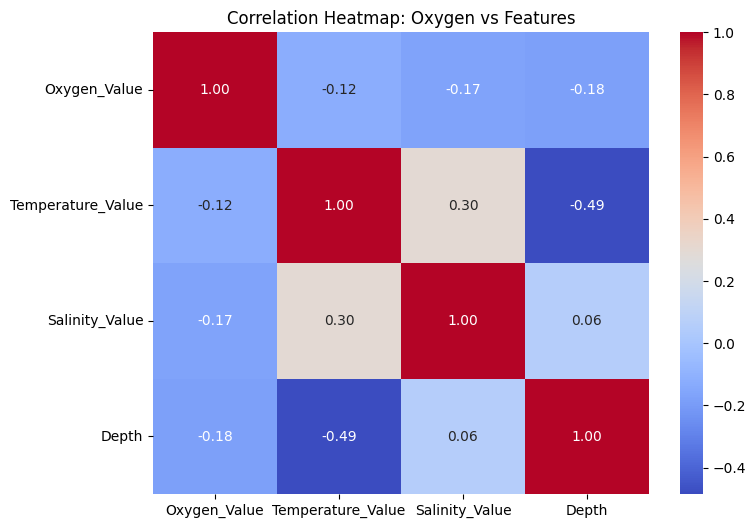

In [6]:
# Scatterplot: Temperature vs Oxygen Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_data["Temperature_Value"], y=combined_data["Oxygen_Value"], alpha=0.5, color="red")
plt.title("Temperature vs Oxygen Level")
plt.xlabel("Temperature (°C)")
plt.ylabel("Oxygen (µmol/kg)")
plt.grid(True)
plt.show()
# Scatterplot: Salinity vs Oxygen Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_data["Salinity_Value"], y=combined_data["Oxygen_Value"], alpha=0.5, color="green")
plt.title("Salinity vs Oxygen Level")
plt.xlabel("Salinity (psu)")
plt.ylabel("Oxygen (µmol/kg)")
plt.grid(True)
plt.show()

# Scatterplot: Depth vs Oxygen Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_data["Depth"], y=combined_data["Oxygen_Value"], alpha=0.5, color="blue")
plt.title("Depth vs Oxygen Level")
plt.xlabel("Depth (m)")
plt.ylabel("Oxygen (µmol/kg)")
plt.grid(True)
plt.show()

# Pairplot for the relationships
sns.pairplot(
    combined_data.sample(500, random_state=42),  # Sampling for faster visualization
    vars=["Oxygen_Value", "Temperature_Value", "Salinity_Value", "Depth"],
    diag_kind="kde"
)
plt.show()

# Correlation Heatmap for feature relationships
correlation_matrix = combined_data[
    ["Oxygen_Value", "Temperature_Value", "Salinity_Value", "Depth"]

].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Oxygen vs Features")
plt.show()